import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# -----QUESTION 1--------------------------- 
# The main inquery question here is "what are the locations with the fastest roller coaster"?
## Getting an idea of the speed_mph distribution
## Getting an idea of the height distribution
## Relationship with speed and height of roller coaster


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [67]:
df  =  pd.read_csv('coaster_db.csv')

In [69]:
print(df)

                                coaster_name                Length  \
0                         Switchback Railway        600 ft (180 m)   
1                          Flip Flap Railway                   NaN   
2     Switchback Railway (Euclid Beach Park)                   NaN   
3               Loop the Loop (Coney Island)                   NaN   
4               Loop the Loop (Young's Pier)                   NaN   
...                                      ...                   ...   
1082                 American Dreier Looping    3,444 ft (1,050 m)   
1083               Pantheon (roller coaster)    3,328 ft (1,014 m)   
1084               Tron Lightcycle Power Run  3,169.3 ft (966.0 m)   
1085                                 Tumbili        770 ft (230 m)   
1086          Wonder Woman Flight of Courage    3,300 ft (1,000 m)   

                        Speed                        Location  \
0            6 mph (9.7 km/h)                    Coney Island   
1                         NaN

# QUESTION 2   

# DATA CLEANING

## Data Understanding

### -Shape
### -Head and Tail
### -dtypes
###  -describe
### - null values
### - missing values


In [11]:
df.shape

(1087, 56)

In [13]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [15]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [17]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [19]:
df.describe() #shoWs some numeric stats 

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [21]:
# step 2: DATA PREPARATION - CLEANING

# - Dropping irrelevant columns and rows
# - Identifying duplicated columns
# - Renaming Columns
# - Feature Creation



In [71]:
# Taking a look at the current columns. Analyzing which columns would be dropped.
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [25]:
#df.drop(['col1','col2'], axis=1)   #axis 1, so that it would drop a column instead of a row.--option 1 
#subsetting our dataset-- another option 2--using this option in this exercise and reassigning it as new dataframe.
#reassign and add a copy_command so that pandas know is a brand new dataframe and not a reference to the old one.

In [73]:
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
    #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #   'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #   'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #  'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #   'Track layout', 'Fastrack available', 'Soft opening date.1',
    #   'Closing date', 
    # 'Opened', 
    #'Replaced by', 'Website',
    #   'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #   'Single rider line available', 'Restraint Style',
    #  'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
    # 'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [77]:
# Checking the new confirm columns.
print(df.columns)

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')


In [79]:
#confirming new shape
df.shape

(1087, 13)

In [81]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [35]:
# "opening date clean" column shows is an object column. But the data type should not be an object
# We can force the column by casting a datetime data type on that column
# pd.to_datetime(df['opening_date_clean'])

In [ ]:
#Changing "opening_date_clean" from object to datetime datatype

In [37]:
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [ ]:
# Redefined data type for that column

In [39]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [41]:
#Renaming a columns to meaninful words or readable fomats
#Using dictionary

In [83]:
df=df.rename(columns = {'coaster_name':'Coaster_Name',
                     'year_introduced':'Year_Introduced',
                    'opening_date_clean':'Opening_Date',
                    'speed_mph':'Speed_mph',
                    'height_ft':'Height_ft',
                    'Inversions_clean': 'Inversions',
                    'Gforce_clean':'Gforce'})

In [85]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [49]:
#Identify missing values and how often do they occur
#using the na -command
#usin na and sum will tell you the number of null values per columns

In [87]:
df.isna()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,False,False,True,True,True,False,True
3,False,False,False,False,False,False,False,False,False,True,True,False,True
4,False,False,False,False,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,False,False,True,False,False,True,True,False,True,False,True,False,False
1083,False,False,False,False,False,False,False,False,False,False,True,False,True
1084,False,False,True,False,False,True,True,False,False,False,True,False,False
1085,False,False,False,False,False,True,True,False,True,False,True,False,True


In [ ]:
#Identify missing values and how often do they occur
#using the na -command
#usin na and sum will tell you the number of null values per columns

In [50]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [51]:
#check for duplicates
# df.duplicated

In [57]:
df.duplicated() #prints out all duplicated rows - from second and additional dulicated rows

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [191]:
# to see the actual duplicated rows with can use "loc"
df.loc[df.duplicated()]

,index,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [91]:
# Print the sum of duplicates to confirm there was none as shown in the previuos command

df.duplicated().sum() #sums out all duplicated rows

0

In [93]:
#Checking if coaster_names have duplicates.

In [113]:
df.duplicated(subset=['Coaster_Name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [115]:
#Printiing all duplicates that exist under a the column"Coaster_name"
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [117]:
#Investigating why some coastal names are duplicated by using query command

In [119]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [121]:
#From my analysis of one of the duplicates for coaster name. Everything else looks the same apart from "Year_introduced".It was probable put online and taking off and  and reintroduced again. Or simply an error.
#I will probably ask for clarification from someone i may have answers too. Or consider only the first year it was introduced.


In [123]:
#Double checking similar duplicated coaster_names if they different"Year introduced"
df.query('Coaster_Name == "Iron Gwazi"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
482,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,1999,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN


In [125]:
#To eliminate duplicated rows. Since we want to coaster names to be unique, other columns that we can look into will be locations and Year introduced. 

In [109]:
df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [127]:
# we can use the inverse syntax to select every apart from duplicates in the aboved mention columns

In [129]:
~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])

0        True
1        True
2        True
3        True
4        True
        ...  
1082    False
1083     True
1084    False
1085     True
1086     True
Length: 1087, dtype: bool

In [135]:
#Viewing the rows that dont have duplicates on those columns andsaving that in our dataframe
#Note this will drop rows NOT  columns
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])]

In [141]:
#Since we dropping rows it will offset a chronologic index order
#Resetting our index using "reset_index
#drop=true to remove index column
# .copy to make this our dataframe
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index\
(drop=True).copy()

In [143]:
df.shape

(990, 14)

In [145]:
df.columns

Index(['index', 'Coaster_Name', 'Location', 'Status', 'Manufacturer',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

# OUESTION 3 

# Exploratory data Analysis and Interpretation of the results. 
# --- FEATURE DISTRIBUTION
# Univariate analysis
# Plotting feature distribution
# -- Histogram
# -- KDE
# -- Boxplot

In [151]:
# Series distribution
    # --- finding how many roller coater where added in each related year--"Year introduced"

In [155]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

In [157]:
#Plotting the series distribution of aggregated sum of roller cater introduced in each year
#Analysis of one column table is to get distribution of the column


# Find when most roller coaster were introduced
## Most of the roller coaster where introduced in 1999.

Text(0, 0.5, 'Counts')

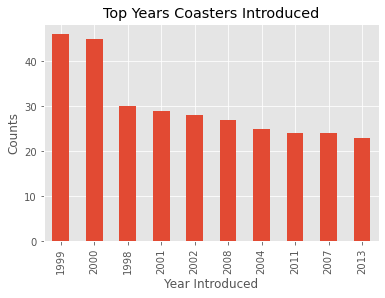

In [199]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Years Coasters Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Counts')

In [201]:
df

,index,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


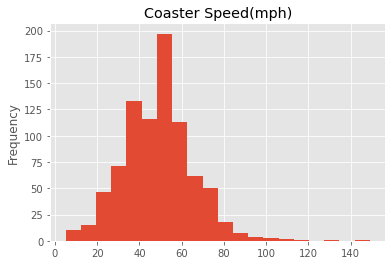

In [326]:
#Getting an idea of the speed_mph distribution
#Note that the early on roller coaster do not have speed_mph value

df['Speed_mph'].plot(kind = 'hist', bins = 20, title = 'Coaster Speed(mph)')
plt.show()

# Majority of the roller coaster roll mostly between 30 - 60 mph

<AxesSubplot:title={'center':'Height_ft distribution)'}, ylabel='Frequency'>

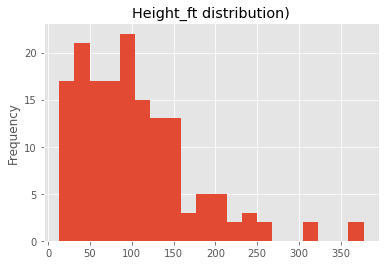

In [320]:
#Getting an idea of the speed_mph distribution
#Note that the early on roller coaster do not have speed_mph value

df['Height_ft'].plot(kind = 'hist', bins = 20, title = 'Height_ft distribution)')

# Most of the roller coasters have a height between 15 - 150 ft

Text(0.5, 0, 'Speed (mph)')

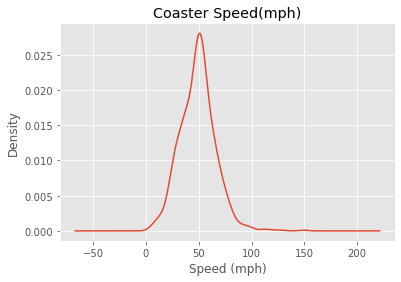

In [215]:
#Looking at the speed_mph distribution using the density plot gives a better visibility of the distribution

ax = df['Speed_mph'].plot(kind = 'kde', title = 'Coaster Speed(mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Height_ft')

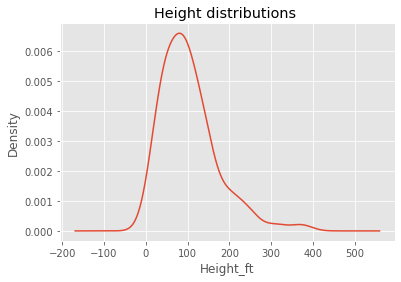

In [324]:
#Looking at the speed_mph distribution using the density plot gives a better visibility of the distribution

ax = df['Height_ft'].plot(kind = 'kde', title = 'Height distributions ')
ax.set_xlabel('Height_ft')

In [217]:
#-------fEATURE RElationship-------
#-----Scatterplot
#-----Heatmap Correlation
#-----Painplot
#-----Groupby comparison

In [219]:
# ----- finding relationship between speed and heigt of roller coaster---


# Speed and Height Relationship: The relationship between speed and height is such that as the coaster descends from a higher point to a lower point, its speed increases. This is because the potential energy is being converted into kinetic energy, and the coaster accelerates due to gravity.

# In practical terms, taller roller coasters generally reach higher speeds because they have more potential energy to convert into kinetic energy. However, other factors like the coaster's design, track layout, and the presence of friction and air resistance also play a significant role in determining the coaster's actual speed.

# It's also worth noting that roller coasters can include elements such as loops, twists, and banked turns, which can further affect their speed and the forces experienced by riders. Therefore, while height is a key factor, it's not the sole determinant of a roller coaster's speed or thrill factor. The coaster's design and engineering are critical in creating the desired ride experience.

# Here's a general overview of how coaster speed relates to height:

# Potential Energy: 
## When a roller coaster is lifted to a certain height, it gains gravitational potential energy. The higher the coaster is lifted, the more potential energy it has. The formula for gravitational potential energy is:

## Potential Energy (PE) = Mass (m) x Gravity (g) x Height (h)

## Where:

### Mass (m) is the mass of the coaster and its passengers.
### Gravity (g) is the acceleration due to gravity (approximately 9.8 m/s² on Earth).
### Height (h) is the height above the ground.
# Kinetic Energy: 
## As the coaster descends from a higher point to a lower point, its potential energy is converted into ### kinetic energy. The formula for kinetic energy is:

### Kinetic Energy (KE) = 0.5 x Mass (m) x Velocity²

### Where:

### Mass (m) is the mass of the coaster and its passengers.
### Velocity (v) is the speed of the coaster.
# Conservation of Energy: 
## According to the law of conservation of energy, the total mechanical energy (the sum of potential and kinetic energy) remains constant in the absence of non-conservative forces like friction and air resistance. As the coaster descends, its potential energy decreases, while its kinetic energy increases.

# --------------------------------------------------------------------








# The following code is useful for visualizing the relationship between the speed and height of coasters. 
# The scatter plot allows us to see if there is any correlation or pattern between these two variables.
# Most the roller coaster are faster with higher heights

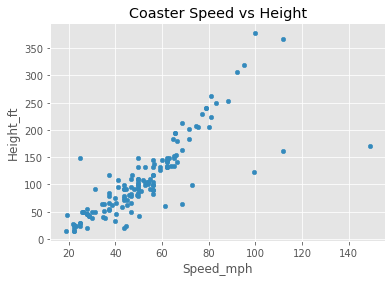

In [226]:
df.plot(kind = 'scatter',
        x = 'Speed_mph',
        y = 'Height_ft',
        title = 'Coaster Speed vs Height')
plt.show()

<AxesSubplot:xlabel='Speed_mph', ylabel='Height_ft'>

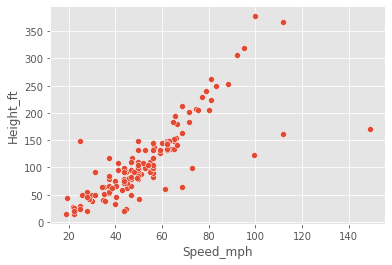

In [228]:

# Using a more advance scatterplot function in seaborn to plot spped vs height plot
sns.scatterplot( x = 'Speed_mph',
        y = 'Height_ft',
        data = df)


In [230]:
# With seaborn you can add other features unlile matplot. 

#--- Adding the the year introduced to a speed vs height plot 
#---to see concentration of roller coasters interms of speed and height

# The following code is useful for visualizing the relationship between the speed and height of coasters. 
# The scatter plot allows us to see if there is any correlation or pattern between these two variables.
# Most the roller coaster are faster with higher heights

# it also shows how the year introduced is scattered on the plot

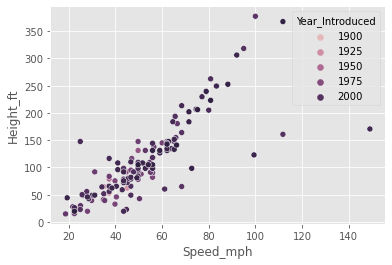

In [236]:
sns.scatterplot( x = 'Speed_mph',
        y = 'Height_ft',
        hue = 'Year_Introduced',
        data = df)

plt.show()

sns.scatterploT()

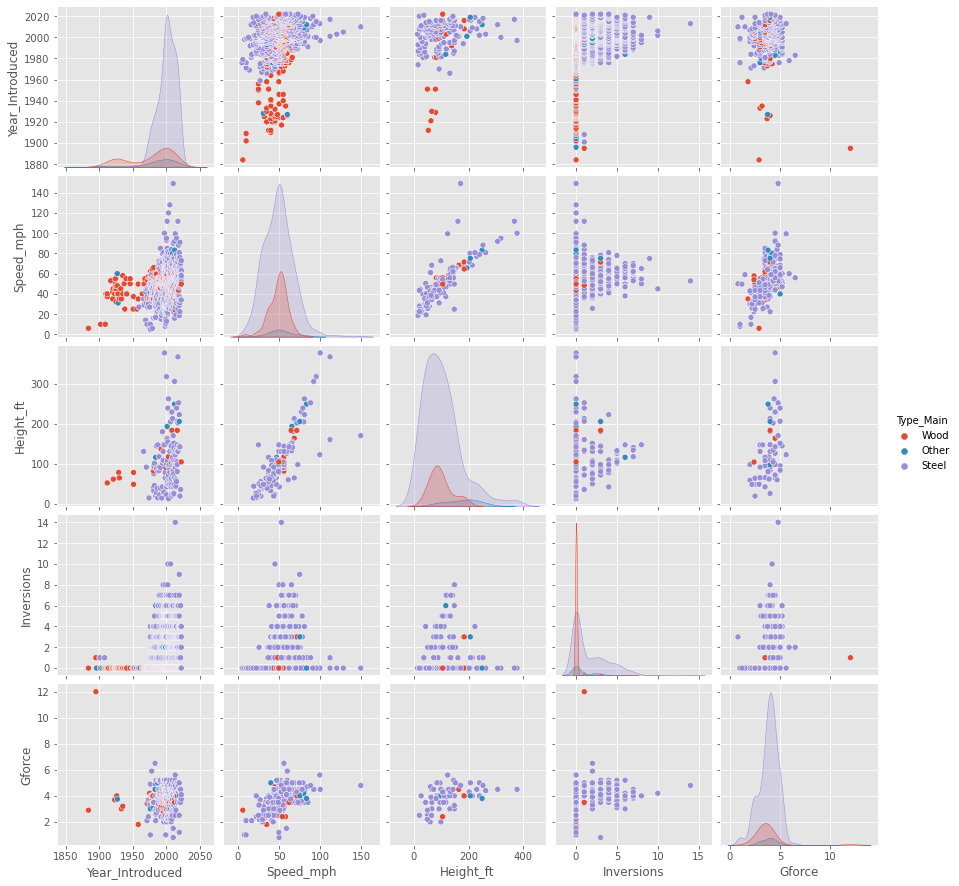

In [244]:
#--- Showing distribution of material used to build roller coasters across different variables
# --- vars= ['Year_Introduced','Speed_mph','Height_ft','Inversions', 'Gforce'],
#--using pairplots




sns.pairplot(df, vars= ['Year_Introduced','Speed_mph','Height_ft','Inversions', 'Gforce'],
            hue='Type_Main')

plt.show()

In [246]:
df

,index,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


# -- Correlation -----
# Correlation between the variables ['Year_Introduced','Speed_mph','Height_ft','Inversions', 'Gforce']

In [258]:
corr = df[['Year_Introduced','Speed_mph','Height_ft','Inversions', 'Gforce']].dropna().corr()

<AxesSubplot:>

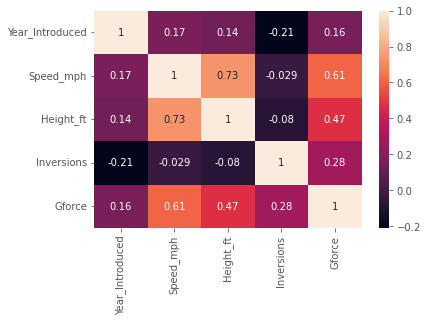

In [264]:
sns.heatmap(corr, annot=True)

In [266]:
#-------------------------------- what are the locations with the fastest roller coaster?

# The main inquery question here is "what are the locations with the fastest roller coaster"?

# Inspect the locations count


In [292]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [300]:
#---The Above has "Other"  as location.We can ignore it for ths analysis because is nit a true location.
df.query('Location != "Other" ')

,index,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
5,5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


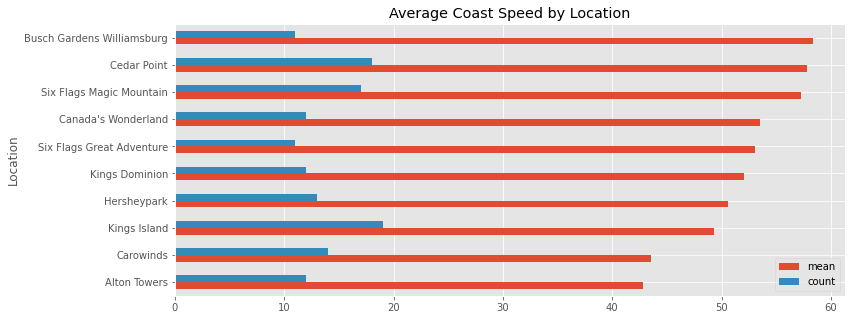

In [340]:
# Group the locations

df.query('Location != "Other" ') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean') \
    .plot(kind = 'barh', figsize = (12, 5), title = 'Average Coast Speed by Location')

ax.set_xlabel('Average Coaster Speed')



plt.show()
 

# Conclusions:
## The above figure shows the distributions between speed and locations for top 10 locations. 
# According to the result some locations have faster roller coasters on average. In this case "Bush Gardens Williamsburg"

In [316]:
unique_values = df['Location'].unique()
print(unique_values)

['Coney Island' 'Sea Lion Park' 'Cleveland, Ohio, United States' 'Other'
 'Lakemont Park' 'Olentangy Park' 'Crystal Beach' 'Kennywood'
 'Revere Beach' 'Luna Park Melbourne' 'Tolchester Beach Park'
 'Lake Compounce' 'Six Flags America' 'Clementon Park'
 'Seabreeze Amusement Park' 'Dreamland Margate' 'Lagoon Amusement Park'
 'Blackpool Pleasure Beach' 'Hersheypark' 'Riverview Park'
 'Santa Cruz Beach Boardwalk' 'Dorney Park & Wildwater Kingdom'
 'Geauga Lake' 'Rocky Glen Park' 'Savin Rock' 'Crystal Beach Park'
 'Sesquicentennial Exposition' 'Luna Park, Coney Island'
 'Palisades Amusement Park' 'Oaks Amusement Park' 'Playland'
 'Monte Igueldo Amusement Park' 'Canobie Lake Park'
 'Great Yarmouth Pleasure Beach' 'Conneaut Lake Park'
 'Idlewild and Soak Zone' 'Lakeside Amusement Park' 'Whalom Park'
 'Six Flags New England' 'Lincoln Park' 'Battersea Park' 'Waldameer Park'
 'Linnanmäki' 'Memphis Kiddie Park' 'Knoebels Amusement Resort'
 'Rides At Adventure Cove' 'Camden Park'
 '63rd and N.W. E

# Question 4 

# Conclusions:
## The above figure shows the distributions between speed and locations for top 10 locations.
## According to the result some locations have faster roller coasters on average. In this case "Bush Gardens Williamsburg"

# Failure
## I did not find patterns and trends

# Future Recommendations: 

## I will include the following to ennhance the analysis of the data and gain deeper insights into the underlying patterns and relationships.

## Time Series Analysis: If the data includes a time component, consider applying time series analysis techniques to identify patterns, trends, and seasonality in the data. This can involve methods such as decomposition, autocorrelation analysis, or forecasting.

## Machine Learning: If applicable, consider applying machine learning algorithms to predict or classify certain outcomes based on the data. This can involve techniques such as regression, classification, or clustering.

## Interpretation and Communication: Finally, interpret the results of the analysis and communicate the findings effectively. Use clear and concise visualizations, tables, and summaries to present the insights gained from the analysis.

### Bernard Bawak